# Kuzushiji Classification with Support Vector Machines

In this notebook we are going to explore the use of Support Vector Machines (SVM) for image classification. We will use a variant of the famous MNIST dataset (the original is a dataset of handwritten digits). The version we are going to use is called Kuzushiji-MNIST or K-MNIST for short (https://github.com/rois-codh/kmnist) and is a dataset of traditional japanese handwritten kana.



The dataset labels are the following:

| Label | Hiragana Character | Romanji (Pronunciation) |
| :-: | :-: | :-: |
|   0   | お | o |
| 1 | き | ki |
| 2 | す | su |
| 3 | つ | tsu |
| 4 | な | na |
| 5 | は | ha |
| 6 | ま | ma |
| 7 | や | ya |
| 8 | れ | re |
| 9 | を | wo |

## TODO: Insert your surname, name and ID number

Student surname: Valentini

Student name: Lorenzo
    
ID: 1187687

In [21]:
#load the required packages

%matplotlib inline  
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import sklearn
import sklearn.metrics as skm
import seaborn as sns
from sklearn import linear_model
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from IPython.display import display, HTML

In [22]:
# helper function to load Kuzushiji-MNIST dataset
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np
    labels_path = os.path.join(path, 'K%s-labels-idx1-ubyte.gz' % kind)
    images_path = os.path.join(path, 'K%s-images-idx3-ubyte.gz' % kind)
    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,offset=8)
    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,offset=16).reshape(len(labels), 784)
    return images, labels

In [23]:
#fix your ID ("numero di matricola") and the seed for random generator (as usual you can try different seeds)
ID = 1187687
np.random.seed(ID)

In [24]:
#load the K-MNIST dataset from the 'data' folder and let's normalize the features so that each value is in [0,1] 

X, y = load_mnist('data', kind='train')
# rescale the data
X, y = X / 255., y # original pixel values are between 0 and 255
print(X.shape, y.shape)

(60000, 784) (60000,)


Now split into training and test. Make sure that each label is present at least 10 times
in training. If it is not, then keep adding permutations to the initial data until this 
happens.

In [25]:
# Random permute the data and split into training and test taking the first 600
# data samples as training and 4000 samples as test
permutation = np.random.permutation(X.shape[0])

X = X[permutation]
y = y[permutation]

m_training = 600
m_test = 4000

X_train, X_test = X[:m_training], X[m_training:m_training+m_test:]
y_train, y_test = y[:m_training], y[m_training:m_training+m_test:]

labels, freqs = np.unique(y_train, return_counts=True)
test_labels, test_freqs = np.unique(y_test, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)
print("Frequencies in test dataset: ", test_freqs)


Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [52 53 49 63 55 58 57 81 64 68]
Frequencies in test dataset:  [376 418 365 394 393 401 396 427 421 409]


In [26]:
#function for plotting a image and printing the corresponding label
def plot_input(X_matrix, labels, index):
    print("INPUT:")
    plt.imshow(
        X_matrix[index].reshape(28,28),
        cmap          = plt.cm.gray_r,
        interpolation = "nearest"
    )
    plt.show()
    print("LABEL: %i"%labels[index])
    return

INPUT:


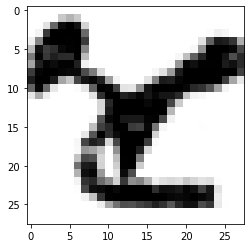

LABEL: 9
INPUT:


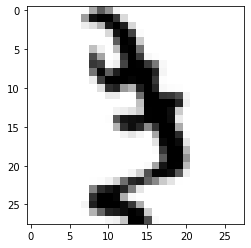

LABEL: 1
INPUT:


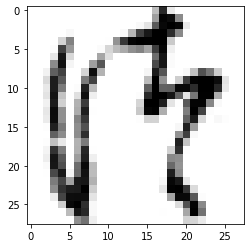

LABEL: 3
INPUT:


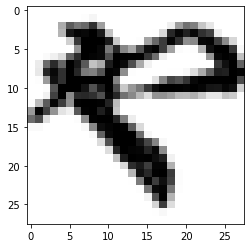

LABEL: 7


In [27]:
#let's try the plotting function
plot_input(X_train,y_train,5)
plot_input(X_test,y_test,50)
plot_input(X_test,y_test,500)
plot_input(X_test,y_test,700)

## TO DO 1
Use a SVM classifier with cross validation to pick a model. Use a 4-fold cross-validation. Let's start with a Linear kernel:

In [28]:
parameters = {'C': [0.01, 0.1, 1, 10]}

svc = SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(X_train,y_train)

df = pd.DataFrame(clf.cv_results_)

print ('RESULTS FOR LINEAR KERNEL')

print("Best parameters set found:",clf.best_params_)

print("Score with best parameters",clf.best_score_)

print("\nScores on the grid:")

print(f'{display(HTML(df[["param_C","mean_test_score"]].to_html()))}')

print("\nComplete results:")

print(f'{display(HTML(df.to_html()))}')

RESULTS FOR LINEAR KERNEL
Best parameters set found: {'C': 10}
Score with best parameters 0.8383333333333333

Scores on the grid:


,param_C,mean_test_score
0,0.01,0.135000
1,0.1,0.136667
2,1,0.825000
3,10,0.838333


None

Complete results:


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.152718,0.033579,0.043630,0.002688,0.01,{'C': 0.01},0.133333,0.133333,0.133333,0.141667,0.133333,0.135000,0.003333,4
1,0.135913,0.002008,0.048609,0.001956,0.1,{'C': 0.1},0.133333,0.141667,0.133333,0.141667,0.133333,0.136667,0.004082,3
2,0.138426,0.006765,0.044299,0.007771,1,{'C': 1},0.783333,0.833333,0.808333,0.866667,0.833333,0.825000,0.027889,2
3,0.138195,0.002132,0.043076,0.002776,10,{'C': 10},0.808333,0.833333,0.858333,0.858333,0.833333,0.838333,0.018708,1


None


## TO DO 2
Pick a model for the Polynomial kernel with degree=2:

In [29]:
parameters = {'kernel':['poly'],'C': [0.01, 0.1, 1],'gamma':[0.01,0.1,1],'degree':[2]}

svc = SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(X_train,y_train)

df = pd.DataFrame(clf.cv_results_)

print ('RESULTS FOR POLY DEGREE=2 KERNEL')

print("Best parameters set found:",clf.best_params_)

print("Score with best parameters",clf.best_score_)

print("\nScores on the grid:")

print(f'{display(HTML(df[["param_C","mean_test_score","param_gamma"]].to_html()))}')

print("\nComplete results:")

print(f'{display(HTML(df.to_html()))}')

RESULTS FOR POLY DEGREE=2 KERNEL
Best parameters set found: {'C': 0.01, 'degree': 2, 'gamma': 0.1, 'kernel': 'poly'}
Score with best parameters 0.7916666666666666

Scores on the grid:


,param_C,mean_test_score,param_gamma
0,0.01,0.135000,0.01
1,0.01,0.791667,0.1
2,0.01,0.791667,1
3,0.1,0.538333,0.01
4,0.1,0.788333,0.1
5,0.1,0.791667,1
6,1,0.791667,0.01
7,1,0.791667,0.1
8,1,0.791667,1


None

Complete results:


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_degree,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.126505,0.005117,0.022506,0.000184,0.01,2,0.01,poly,"{'C': 0.01, 'degree': 2, 'gamma': 0.01, 'kernel': 'poly'}",0.133333,0.133333,0.133333,0.141667,0.133333,0.135000,0.003333,9
1,0.098196,0.004029,0.018522,0.000428,0.01,2,0.1,poly,"{'C': 0.01, 'degree': 2, 'gamma': 0.1, 'kernel': 'poly'}",0.775000,0.783333,0.833333,0.800000,0.766667,0.791667,0.023570,1
2,0.101654,0.002180,0.017700,0.000333,0.01,2,1,poly,"{'C': 0.01, 'degree': 2, 'gamma': 1, 'kernel': 'poly'}",0.783333,0.800000,0.808333,0.783333,0.783333,0.791667,0.010541,1
3,0.116513,0.001199,0.022311,0.000182,0.1,2,0.01,poly,"{'C': 0.1, 'degree': 2, 'gamma': 0.01, 'kernel': 'poly'}",0.533333,0.475000,0.558333,0.575000,0.550000,0.538333,0.034400,8
4,0.102345,0.003474,0.017865,0.000455,0.1,2,0.1,poly,"{'C': 0.1, 'degree': 2, 'gamma': 0.1, 'kernel': 'poly'}",0.775000,0.800000,0.808333,0.775000,0.783333,0.788333,0.013540,7
5,0.101891,0.001992,0.017963,0.000583,0.1,2,1,poly,"{'C': 0.1, 'degree': 2, 'gamma': 1, 'kernel': 'poly'}",0.783333,0.800000,0.808333,0.783333,0.783333,0.791667,0.010541,1
6,0.096969,0.002329,0.018952,0.000623,1,2,0.01,poly,"{'C': 1, 'degree': 2, 'gamma': 0.01, 'kernel': 'poly'}",0.775000,0.783333,0.833333,0.800000,0.766667,0.791667,0.023570,1
7,0.101438,0.002204,0.017988,0.000528,1,2,0.1,poly,"{'C': 1, 'degree': 2, 'gamma': 0.1, 'kernel': 'poly'}",0.783333,0.800000,0.808333,0.783333,0.783333,0.791667,0.010541,1
8,0.102852,0.003079,0.018608,0.001179,1,2,1,poly,"{'C': 1, 'degree': 2, 'gamma': 1, 'kernel': 'poly'}",0.783333,0.800000,0.808333,0.783333,0.783333,0.791667,0.010541,1


None


## TO DO 3

Now let's try a higher degree for the polynomial kernel (e.g., 3rd degree).

In [30]:
parameters = {'kernel':['poly'],'C': [0.01, 0.1, 1],'gamma':[0.01,0.1,1],'degree':[3]}

svc = SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(X_train,y_train)

df = pd.DataFrame(clf.cv_results_)

print ('RESULTS FOR POLY DEGREE=3 KERNEL')

print("Best parameters set found:",clf.best_params_)

print("Score with best parameters",clf.best_score_)

print("\nScores on the grid:")

print(f'{display(HTML(df[["param_C","mean_test_score","param_gamma"]].to_html()))}')

print("\nComplete results:")

print(f'{display(HTML(df.to_html()))}')

RESULTS FOR POLY DEGREE=3 KERNEL
Best parameters set found: {'C': 1, 'degree': 3, 'gamma': 0.01, 'kernel': 'poly'}
Score with best parameters 0.76

Scores on the grid:


,param_C,mean_test_score,param_gamma
0,0.01,0.135000,0.01
1,0.01,0.746667,0.1
2,0.01,0.733333,1
3,0.1,0.490000,0.01
4,0.1,0.733333,0.1
5,0.1,0.733333,1
6,1,0.760000,0.01
7,1,0.733333,0.1
8,1,0.733333,1


None

Complete results:


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_degree,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.125684,0.004918,0.022643,0.000451,0.01,3,0.01,poly,"{'C': 0.01, 'degree': 3, 'gamma': 0.01, 'kernel': 'poly'}",0.133333,0.133333,0.133333,0.141667,0.133333,0.135000,0.003333,9
1,0.113097,0.003600,0.020361,0.004457,0.01,3,0.1,poly,"{'C': 0.01, 'degree': 3, 'gamma': 0.1, 'kernel': 'poly'}",0.733333,0.775000,0.758333,0.716667,0.750000,0.746667,0.020138,2
2,0.112860,0.005088,0.018261,0.000571,0.01,3,1,poly,"{'C': 0.01, 'degree': 3, 'gamma': 1, 'kernel': 'poly'}",0.700000,0.758333,0.758333,0.708333,0.741667,0.733333,0.024721,3
3,0.119154,0.002457,0.022396,0.000201,0.1,3,0.01,poly,"{'C': 0.1, 'degree': 3, 'gamma': 0.01, 'kernel': 'poly'}",0.533333,0.416667,0.525000,0.475000,0.500000,0.490000,0.041966,8
4,0.111200,0.002413,0.018209,0.000619,0.1,3,0.1,poly,"{'C': 0.1, 'degree': 3, 'gamma': 0.1, 'kernel': 'poly'}",0.700000,0.758333,0.758333,0.708333,0.741667,0.733333,0.024721,3
5,0.111029,0.002650,0.018271,0.000723,0.1,3,1,poly,"{'C': 0.1, 'degree': 3, 'gamma': 1, 'kernel': 'poly'}",0.700000,0.758333,0.758333,0.708333,0.741667,0.733333,0.024721,3
6,0.109630,0.002154,0.019094,0.000332,1,3,0.01,poly,"{'C': 1, 'degree': 3, 'gamma': 0.01, 'kernel': 'poly'}",0.750000,0.775000,0.783333,0.758333,0.733333,0.760000,0.017795,1
7,0.111135,0.002548,0.017781,0.000414,1,3,0.1,poly,"{'C': 1, 'degree': 3, 'gamma': 0.1, 'kernel': 'poly'}",0.700000,0.758333,0.758333,0.708333,0.741667,0.733333,0.024721,3
8,0.111716,0.003281,0.017896,0.000420,1,3,1,poly,"{'C': 1, 'degree': 3, 'gamma': 1, 'kernel': 'poly'}",0.700000,0.758333,0.758333,0.708333,0.741667,0.733333,0.024721,3


None


## TO DO 4
Pick a model for the Radial Basis Function kernel:

In [31]:
parameters = {'kernel':['rbf'],'C': [0.1, 1, 10, 100],'gamma':[0.001, 0.01, 0.1,1]}

svc = SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(X_train,y_train)

df = pd.DataFrame(clf.cv_results_)

print("Best parameters set found:",clf.best_params_)

print("Score with best parameters",clf.best_score_)

print("\nScores on the grid:")

print(f'{display(HTML(df[["param_C","param_gamma","mean_test_score"]].to_html()))}')

print("\nComplete results:")

print(f'{display(HTML(df.to_html()))}')

Best parameters set found: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Score with best parameters 0.8400000000000001

Scores on the grid:


,param_C,param_gamma,mean_test_score
0,0.1,0.001,0.135000
1,0.1,0.01,0.138333
2,0.1,0.1,0.135000
3,0.1,1,0.135000
4,1,0.001,0.678333
5,1,0.01,0.825000
6,1,0.1,0.135000
7,1,1,0.135000
8,10,0.001,0.791667
9,10,0.01,0.840000


None

Complete results:


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.133259,0.006483,0.041412,0.000320,0.1,0.001,rbf,"{'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}",0.133333,0.133333,0.133333,0.141667,0.133333,0.135000,0.003333,10
1,0.135868,0.003452,0.044345,0.002251,0.1,0.01,rbf,"{'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}",0.133333,0.150000,0.133333,0.141667,0.133333,0.138333,0.006667,9
2,0.142333,0.001990,0.046527,0.005098,0.1,0.1,rbf,"{'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}",0.133333,0.133333,0.133333,0.141667,0.133333,0.135000,0.003333,10
3,0.146275,0.000611,0.042836,0.002258,0.1,1,rbf,"{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}",0.133333,0.133333,0.133333,0.141667,0.133333,0.135000,0.003333,10
4,0.115558,0.001562,0.043360,0.002130,1,0.001,rbf,"{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}",0.633333,0.658333,0.675000,0.733333,0.691667,0.678333,0.033582,6
5,0.133340,0.001996,0.048582,0.009528,1,0.01,rbf,"{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}",0.783333,0.833333,0.808333,0.866667,0.833333,0.825000,0.027889,3
6,0.148515,0.003838,0.049552,0.009922,1,0.1,rbf,"{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}",0.133333,0.133333,0.133333,0.141667,0.133333,0.135000,0.003333,10
7,0.148992,0.001056,0.044922,0.001741,1,1,rbf,"{'C': 1, 'gamma': 1, 'kernel': 'rbf'}",0.133333,0.133333,0.133333,0.141667,0.133333,0.135000,0.003333,10
8,0.085139,0.001018,0.039733,0.000960,10,0.001,rbf,"{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}",0.758333,0.775000,0.808333,0.808333,0.808333,0.791667,0.021082,4
9,0.135544,0.000492,0.042772,0.002438,10,0.01,rbf,"{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}",0.808333,0.841667,0.858333,0.858333,0.833333,0.840000,0.018559,1


None


## QUESTION 1
What do you observe when using linear, polynomial and RBF kernels on this dataset ?

For a linear kernel I get a good accuracy for C=1,10 (0.8) and a bad accuracy for C=0.1,0.01 (0.1).\
For a 2-degree-poly kernel I get a good accuracy (.8) for nearly every value of C and gamma. Exceptions are C=0.01, gamma=0.01 (accuracy=0.1) and C=0.1, gamma=0.01 (accuracy=0.5).\
For a 3-degree-poly kernel I get similar results, with an accuracy of about 0.7. Exceptions are C=0.01, gamma=0.01 (accuracy=0.1) and C=0.1, gamma=0.01 (accuracy=0.5).\
For an rbf kernel I get many different accuracies for different values of the couple of parameters. Many couples of parameters give a really bad accuracy (0.1), however for C=10 or 100, gamma=0.01 I reach the best accuracy (0.84) mong all the possible kernels and parameters.

## TO DO 5
Report here the best SVM kernel and parameters

In [32]:
best_SVM = SVC(kernel = 'rbf', C = 10, gamma = 0.01 )

best_SVM.fit(X_train, y_train)

training_error = 1.-best_SVM.score(X_train, y_train)
test_error = 1.-best_SVM.score(X_test, y_test)

print ("Best SVM training error: %f" % training_error)
print ("Best SVM test error: %f" % test_error)

Best SVM training error: 0.000000
Best SVM test error: 0.168000


## TO DO 6

Analyze how the gamma parameter (inversely proportional to standard deviation of Gaussian Kernel) impact the performances of the classifier

In [33]:
#Test with different values of gamma

# Set gamma values
gamma_values = np.logspace(-5,2,8)
print(gamma_values)


[1.e-05 1.e-04 1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02]


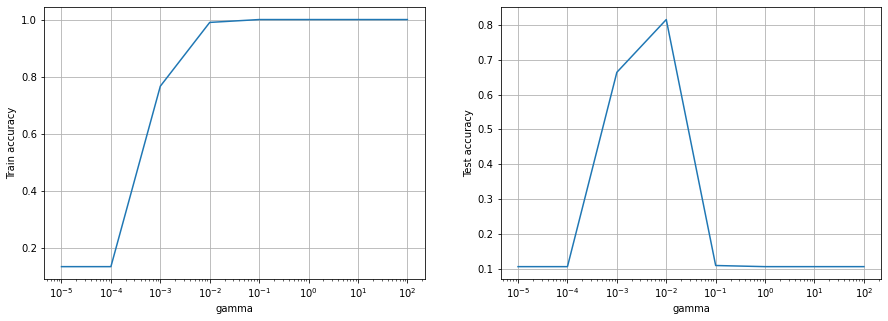

In [34]:
# Try the SVM with the previously set values of gamma
# use rbf kernel and C=1

train_acc_list, test_acc_list = [], []

    
# ADD YOUR CODE TO TRAIN THE SVM MULTIPLE TIMES WITH THE DIFFERENT VALUES OF GAMMA
# PLACE THE TRAIN AND TEST ACCURACY FOR EACH TEST IN THE TRAIN AND TEST ACCURACY LISTS
for i in gamma_values:
    temp_SVM = SVC(kernel = 'rbf', C = 1, gamma = i)
    temp_SVM.fit(X_train, y_train)
    #temp_tr_error = 1.-temp_SVM.score(X_train, y_train)
    #temp_ts_error = 1.-temp_SVM.score(X_test, y_test)
    train_acc_list.append(temp_SVM.score(X_train, y_train))
    test_acc_list.append(temp_SVM.score(X_test, y_test))
    
# Plot
fig, ax = plt.subplots(1,2, figsize=(15,5))

ax[0].plot(gamma_values, train_acc_list)
ax[0].set_xscale('log')
ax[0].set_xlabel('gamma')
ax[0].set_ylabel('Train accuracy')
ax[0].grid(True)

ax[1].plot(gamma_values, test_acc_list)
ax[1].set_xscale('log')
ax[1].set_xlabel('gamma')
ax[1].set_ylabel('Test accuracy')
ax[1].grid(True)


plt.show()

## QUESTION 2
How do the train and test error change when changing gamma ? Which is the best value of gamma ? 
Connect your answers to the discussion about the overfitting issue.

For the smallest values of gamma the performance on both training and test set is poor.\
Increasing gamma (which means reducing the variances of the kernel's gaussians) allows to fit much better the training set. Obviously this leads to problems of overfitting that start for gamma greater than $10^{-2}$. In fact we see that for those values the accuracy on the test set drops down to 0.1 again. Therefore the best value for gamma is $10^{-2}$.\
Even without looking at the test set, a hint could have been the fact that gamma=0.01 was the last value for which the accracy on the training set wasn't exactly equal 1.

## More data
Now let's do the same but using more data points for training.


Choose a new number of data points.

In [35]:
X = X[permutation]
y = y[permutation]

m_training = 2000 # TODO number of data points, adjust depending on the capabilities of your PC

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)

Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [180 228 216 196 170 200 196 211 196 207]


## TO DO 7

Let's try to use SVM with parameters obtained from the best model for $m_{training} =  2000$. Since it may take a long time to run, you can decide to just let it run for some time and stop it if it does not complete. If you decide to do this, report it in the cell below.

In [36]:
best_SVM = SVC(kernel = 'rbf', C = 10, gamma = 0.01 )

best_SVM.fit(X_train, y_train)

training_error = 1.-best_SVM.score(X_train, y_train)
test_error = 1.-best_SVM.score(X_test, y_test)

print ("Best SVM training error: %f" % training_error)
print ("Best SVM test error: %f" % test_error)

Best SVM training error: 0.000000
Best SVM test error: 0.111810


Just for comparison, let's also use logistic regression 

## TO DO 8 Try first without regularization (use a very large large C)¶

In [37]:
logreg = linear_model.LogisticRegression(C=1e10)

logreg.fit(X_train, y_train)

training_error = 1-logreg.score(X_train, y_train)
test_error = 1-logreg.score(X_test, y_test)
print ("Best logistic regression training error: %f" % training_error)
print ("Best logistic regression test error: %f" % test_error)

Best logistic regression training error: 0.000000
Best logistic regression test error: 0.284931


## TO DO 9 Try  with regularization (use C=1)¶

In [38]:
logreg = linear_model.LogisticRegression(C=1, max_iter=1000)

logreg.fit(X_train, y_train)

training_error = 1-logreg.score(X_train, y_train)
test_error = 1-logreg.score(X_test, y_test)
print ("Best logistic regression training error: %f" % training_error)
print ("Best logistic regression test error: %f" % test_error)

Best logistic regression training error: 0.001500
Best logistic regression test error: 0.250672


## QUESTION 3
Compare and discuss:
- the results from SVM with m=600 and with m=2000 training data points. If you stopped the SVM, include such aspect in your comparison.
- the results of SVM and of Logistic Regression

### 3.1)

The SVM's training error goes to zero in both cases. Clearly, the bigger the training set, the more accurate are our predictions. This in fact is what we observe when comparing the two results on the test set, where we have errors of 0.11 and 0.17.

### 3.2)

SVM results much better than the logistic regression (independently by the regularization of the log-reg). While the errors on the training set are close to zero for both, the errors on the test set are 0.16 for the SVM and more than 0.25 for the log-reg.

## TO DO 10
Plot an item of clothing that is missclassified by logistic regression and correctly classified by SVM.

according to the svm: 8
according to the log regression: 5
INPUT:


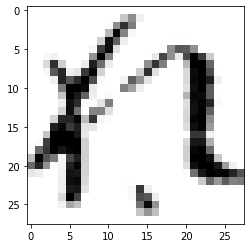

LABEL: 8


In [39]:
y_pred_svm = best_SVM.predict(X_test)
y_pred_log = logreg.predict(X_test)

for i in range (len(y_pred_svm)):
    if y_pred_svm[i]!=y_pred_log[i]:
        index_miscl=i
        break
print("according to the svm:",y_pred_svm[index_miscl])
print("according to the log regression:",y_pred_log[index_miscl])

plot_input(X_test,y_test,index_miscl)

## TO DO 11
Plot the confusion matrix for the SVM classifier and for logistic regression.
The confusion matrix has one column for each predicted label and one row for each true label. 
It shows for each class in the corresponding row how many samples belonging to that class gets each possible output label.
Notice that the diagonal contains the correctly classified samples, while the other cells correspond to errors.
You can obtain it with the sklearn.metrics.confusion_matrix function (see the documentation).
Try also to normalize the confusion matrix by the number of samples in each class in order to measure the accuracy on each single class.


In [46]:
np.set_printoptions(precision=2, suppress=True, floatmode='fixed')
u, counts = np.unique(y_test, return_counts=True)
print("Labels and frequencies in test set: ", counts)

confusion_LR = metrics.confusion_matrix(y_test, y_pred_log)
print("\n Confusion matrix LR  \n \n", confusion_LR)
print("\n Confusion matrix LR (normalized)   \n \n", confusion_LR /counts[:,None] )

confusion_SVM = metrics.confusion_matrix(y_test, y_pred_svm)
print("\n Confusion matrix SVM  \n \n", confusion_SVM)
print("\n Confusion matrix SVM (normalized)   \n \n", confusion_SVM /counts[:,None] )

Labels and frequencies in test set:  [5820 5772 5784 5804 5830 5800 5804 5789 5804 5793]

 Confusion matrix LR  
 
 [[5004   29   32   54  158  157   10  219   55  102]
 [  32 4380  398  103  149   67  210   34  190  209]
 [   9  334 3754  147  150  206  492   73  395  224]
 [  24  174  139 4596  169  282   59  178  155   28]
 [ 245  412  349  131 3940  102  196  168  121  166]
 [ 120  209  134  300   71 4557  112  114  158   25]
 [  49  433  610   82  190   96 3985  162  155   42]
 [  59  111  153  108  161  134  118 4734  107  104]
 [ 108  326  369  180   42  159  236   30 4293   61]
 [  71  453  324   40  217   73   94  114  189 4218]]

 Confusion matrix LR (normalized)   
 
 [[0.86 0.00 0.01 0.01 0.03 0.03 0.00 0.04 0.01 0.02]
 [0.01 0.76 0.07 0.02 0.03 0.01 0.04 0.01 0.03 0.04]
 [0.00 0.06 0.65 0.03 0.03 0.04 0.09 0.01 0.07 0.04]
 [0.00 0.03 0.02 0.79 0.03 0.05 0.01 0.03 0.03 0.00]
 [0.04 0.07 0.06 0.02 0.68 0.02 0.03 0.03 0.02 0.03]
 [0.02 0.04 0.02 0.05 0.01 0.79 0.02 0.02 0.03 


 Another nice way to visualize the same result is using heatmaps with a logarithmic scale (to see better the different colors):


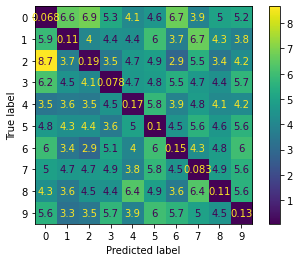

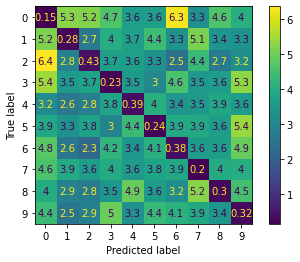

In [47]:
print("\n Another nice way to visualize the same result is using heatmaps with a logarithmic scale (to see better the different colors):")
confusion_SVM_ln=np.log((confusion_SVM+1)/counts[:,None])
confusion_LR_ln=np.log((confusion_LR+1)/counts[:,None])

disp1 = ConfusionMatrixDisplay(confusion_matrix=-confusion_SVM_ln, display_labels=None)
disp1.plot()
disp1 = ConfusionMatrixDisplay(confusion_matrix=-confusion_LR_ln, display_labels=None)
disp1.plot()
plt.show()

## QUESTION 4
Have a look at the confusion matrices and comment on the obtained accuracies. Why some classes have lower accuracies and others an higher one ? Make some guesses on the possible causes.


From the confusion matrices we can see that the two most difficult images to distinguish are labels 2-6. Other couples of less difficult but still often misclassified labels are: 1-9, 1-6, 2-9.\
Coherently we see that the term (2,2) is the smaller in value on the entire diagonal of the matrix.\
In fact we see that label that are rarely misclassified are much different from each other (like 0-2), while 2-6 are very similar (they both have a small circle in the bottom and are bot sword shaped at the top, with 6 only having one horizzontal line more than 2).